In [1]:
%matplotlib inline

from __future__ import division
import csv
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from scipy import signal
from scipy import stats
from scipy import optimize
import pylab
import csv
from basic_definitions import *
from math import floor
import time      
from IPython.core.debugger import Tracer
import matlab.engine
from tqdm import tqdm
import scipy
from collections import Counter, defaultdict
from itertools import count
import pandas as pd
import os
from tabulate import tabulate




In [3]:
df   = pd.read_csv('changing_T_results_larege_1000_with_J41_cor.csv')
df5  = pd.read_csv('changing_T_results_larege_1000_with_J5_cor.csv')
df11 = pd.read_csv('changing_T_results_larege_1000_with_J11_cor.csv')
df21 = pd.read_csv('changing_T_results_larege_1000_with_J21_cor.csv')



In [4]:
df['Stochastic41'] = df['Stochastic']
df['Stochastic41 cor'] = df['Stochastic corrected']

df['Stochastic11'] = df11['Stochastic']
df['Stochastic11 cor'] = df11['Stochastic corrected']

df['Stochastic5'] = df5['Stochastic']
df['Stochastic5 cor'] = df5['Stochastic corrected']

df['Stochastic21'] = df21['Stochastic']
df['Stochastic21 cor'] = df21['Stochastic corrected']



In [5]:
print "J=5"
print df['Stochastic5'].mean()
print df['Stochastic5 cor'].mean()
print "J=11"
print df['Stochastic11'].mean()
print df['Stochastic11 cor'].mean()
print "J=21"
print df['Stochastic21'].mean()
print df['Stochastic21 cor'].mean()
print "J=41"
print df['Stochastic41'].mean()
print df['Stochastic41 cor'].mean()

print "Perfect"
print df['Perfect'].mean()

print "Deterministic"
print df['Deterministic'].mean()
print df5['Deterministic'].mean()
print df11['Deterministic'].mean()
print df21['Deterministic'].mean()




#df['Stochastic21 cor2'] = df['Stochastic21 cor'].where(df['Stochastic21 cor'] < 23000)
df['Stochastic21 cor2']  = [x if x <= 200000 else x*0.9 for x in df['Stochastic21 cor']]
print df['Stochastic41 cor'].mean()*0.9
print df['Stochastic21 cor2'].mean()
print df['Stochastic41 cor'].mean()*0.9/df['Stochastic21 cor2'].mean()


df_results = pd.DataFrame()

df_results['Perfect'] = df['Perfect']/100.0
df_results['Deterministic'] = df['Deterministic']/100.0
df_results['Stochastic 41'] = df['Stochastic41 cor']*0.9/100.0
df_results['Stochastic 21'] = df['Stochastic21 cor2']/100.0
df_results['Difference 21'] = df_results['Deterministic']-df_results['Stochastic 21']
df_results['Difference 41'] = df_results['Deterministic']-df_results['Stochastic 41']
df_results.index.name = 'Day'

print df_results['Difference 21'].std() 
print df_results['Difference 41'].std()

df_results

J=5
11282.1332676
12966.3011663
J=11
58306.8806564
69279.293506
J=21
104706.119957
143114.896342
J=41
167581.218195
143536.338043
Perfect
91940.2888351
Deterministic
154791.623408
12114.3054608
48100.3536747
119868.925591
129182.704239
140221.460416
0.921276271516
365.49739589
160.780452669


Perfect  Deterministic  Stochastic 41  Stochastic 21  Difference 21  \
Day                                                                            
0     729.032560    1358.304436    1159.466107     957.081294     401.223142   
1    1059.206747    1692.643105    1352.231935    1109.355682     583.287422   
2    1146.811506    1786.616498    1469.740740    1757.700535      28.915963   
3    1181.910372    1798.451085    1500.720419    1811.913682     -13.462597   
4    1183.110343    1803.327027    1507.511250    2466.639000    -663.311973   
5    1156.579315    1787.351535    1479.378063    1763.304868      24.046667   
6     950.559554    1643.384839    1319.179929    1851.381262    -207.996423   
7    1014.552128    1670.019693    1246.758417    1921.721519    -251.701826   
8    1144.009691    1759.809245    1303.217350    1522.314943     237.494302   
9    1177.832575    1814.775000    1509.725000    1537.417240     277.357760   
10   1029.262378    1587.077950    1383.160270    1241.110674     345.967276   
11    941.750061    1551.971346    1226.318457    1582.439100     -30.467754   
12   1146.862683    1798.451085    1471.017264    1899.491793    -101.040707   
13    853.190491    1455.489097    1384.320388    1104.057435     351.431662   
14    757.522783    1608.500817    1340.155678    1238.787142     369.713675   
15     13.691053     509.801869     273.362963     132.271532     377.530337   
16    247.391583    1230.665949    1106.454811     631.207528     599.458422   
17     35.965842     896.214536     992.752864     806.671708      89.542829   
18      0.000000     800.254011     746.011973     142.228256     658.025754   
19      0.000000     516.270261     381.010188     180.763685     335.506576   
20    951.349602    1692.495282     987.322030     561.177242    1131.318040   
21   1039.405926    1709.056341    1325.958538    1308.790392     400.265949   
22    619.458541    1324.105464    1294.929814    1165.429183     158.676281   
23     25.628254     555.175491     676.706702     485.625455      69.550037   
24    159.206779    1127.511671     813.032214     624.188511     503.323160   
25    856.588242    1418.155507     982.214669     892.433826     525.721680   
26   1131.561864    1776.210812    1678.398067    1783.048084      -6.837272   
27   1191.380172    1814.775000    1354.248135    2407.938750    -593.163750   
28   1177.832575    1814.775000    1505.979698    1860.533365     -45.758365   
29    955.642303    1700.502707    1322.306930    1811.709100    -111.206394   
..           ...            ...            ...            ...            ...   
970  1186.786313    1797.036224    1575.961841    1599.018750     198.017474   
971  1179.827667    1794.952667    1516.050000    1000.580000     794.372667   
972  1116.484813    1786.229885    1480.938479    1651.260456     134.969429   
973  1075.439369    1738.497322    1451.799237     689.223481    1049.273842   
974   875.523238    1591.319083    1462.105993    1250.760926     340.558156   
975   943.548941    1751.285059    1486.120339    1176.263714     575.021345   
976  1137.342204    1788.699203    1468.549373    1211.123004     577.576199   
977  1194.774059    1814.775000    1356.920821    1145.356841     669.418159   
978  1141.533738    1798.064472    1506.311841    1522.646090     275.418382   
979   942.560392    1435.601996    1028.097929     907.358139     528.243857   
980  1160.092946    1791.145039    1497.109802     848.575000     942.570039   
981  1019.144517    1505.925107    1253.944152    1087.729381     418.195726   
982  1199.650000    1814.775000    1507.511250    1837.169444     -22.394444   
983  1199.650000    1814.775000    1509.725000    1762.075000      52.700000   
984  1141.967958    1805.023117    1506.311841    1844.165417     -39.142300   
985  1141.766327    1780.713162    1328.221531    2038.962104    -258.248941   
986  1148.290752    1766.086191    1488.119036    1557.044224     209.041967   
987  1095

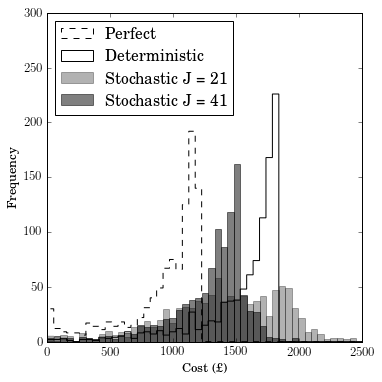

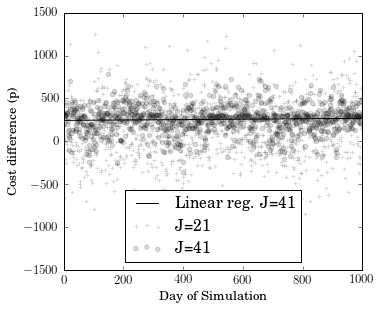

r-squared: 0.00185070542232
p-value: 0.174040717128


In [6]:
## Figures for paper!

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=13)

bins = np.linspace(0, 2500, 50)
plt.figure(figsize=(5.5,5.5))
plt.hist(df_results['Perfect'], bins, histtype='step', color='black', alpha=1, linestyle = 'dashed', label='Perfect')
plt.hist(df_results['Deterministic'], bins, histtype='step', color='black', alpha=1, label='Deterministic')
plt.hist(df_results['Stochastic 21'], bins, color='black', alpha=0.3, label='Stochastic J = 21')
plt.hist(df_results['Stochastic 41'], bins, color='black', alpha=0.5, label='Stochastic J = 41')
plt.axis([0,2500,0,300])
plt.legend(loc='upper left')
plt.xlabel(r'Cost (\pounds)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Combined.pdf")
plt.show()


fig = plt.figure(figsize=(5.5,4.5))
plt.scatter(df_results.index,df_results['Difference 21'], color='black', marker='+', alpha = 0.15, label='J=21')
plt.scatter(df_results.index,df_results['Difference 41'], color='black',marker='o', alpha = 0.15, label='J=41')
p = np.polyfit(df_results.index, df_results['Difference 41'], 1)
plt.plot(df_results.index, np.poly1d(p)(df_results.index),label='Linear reg. J=41', color='k')
plt.axis([0, 1000, -1500, 1500])
plt.ylabel(r'Cost difference (p)')
plt.xlabel(r'Day of Simulation')
plt.legend(loc='lower center')
#lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#fig.subplots_adjust(right=0.8)
#plt.savefig("scatter.pdf",bbox_extra_artists=(lgd,),bbox_inches='tight')
plt.savefig("scatter.pdf")
 
plt.show()


#A = np.vstack([df_results.index, np.ones(len(df_results.index))]).T
#print  np.linalg.lstsq(A, df_results['Difference 41'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df_results.index,df_results['Difference 41'])
print "r-squared:", r_value**2
print "p-value:", p_value
#import seaborn as sns

#sns.regplot(df['Day'], df_results['Difference 41'], marker="+")




In [7]:
# make table
headers = ["Simulation:","Summary statistics",""]

table = [
        ["Perfect",          df_results['Perfect'].mean(),      df_results['Perfect'].std() ],
        ["Deterministic",    df_results['Deterministic'].mean(),df_results['Deterministic'].std()],
        ["Stochastic $J=21$",df_results['Stochastic 21'].mean(),df_results['Stochastic 21'].std()],
        ["Difference $J=21$",df_results['Difference 21'].mean(),df_results['Difference 21'].std()],
        ["Stochastic $J=41$",df_results['Stochastic 41'].mean(),df_results['Stochastic 41'].std()],
        ["Difference $J=41$",df_results['Difference 41'].mean(),df_results['Difference 41'].std()]]


#table = table.tolist()

print tabulate(table, headers, tablefmt="latex")

\begin{tabular}{lrr}
\hline
 Simulation:       &   Summary statistics &         \\
\hline
 Perfect           &              919.403 & 314.495 \\
 Deterministic     &             1547.92  & 340.286 \\
 Stochastic \$J=21\$ &             1402.21  & 466.043 \\
 Difference \$J=21\$ &              145.702 & 365.497 \\
 Stochastic \$J=41\$ &             1291.83  & 305.14  \\
 Difference \$J=41\$ &              256.089 & 160.78  \\
\hline
\end{tabular}


[ 0.15875   0.3682    1.34595   2.957625]


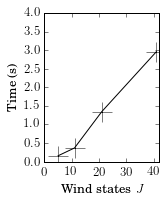

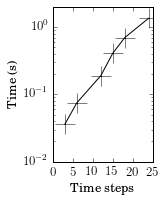

In [12]:
# times
#1:05:30 5
#2:27:17 11
#8:58:23 21
#19:43:03 41
        
J =     np.array([5,11,21,41])
timesJ = np.array([63.5, 147.28, 538.38,1183.05 ])*60/24/1000
print timesJ

plt.figure(figsize=(2.5,3))
plt.plot(J,timesJ,marker='+',ms=20,color='k')
plt.axis([0,42,0,4])
plt.xticks(np.arange(0, 41, 10))
plt.xlabel(r'Wind states $J$')
plt.ylabel(r'Time (s)')
plt.tight_layout()
plt.savefig("J_speed.pdf")
plt.show()

T = np.array([3,6,12,15,18,24])
timesT = np.array([0.036,0.075,0.19,0.41,0.7,1.36])
plt.figure(figsize=(2.5,3))
plt.semilogy (T,timesT,marker='+', ms=20,color='k')
plt.axis([0,25,0.01,2])
plt.xlabel(r'Time steps')
plt.ylabel(r'Time (s)')
plt.tight_layout()
plt.savefig("T_speed.pdf")
plt.show()

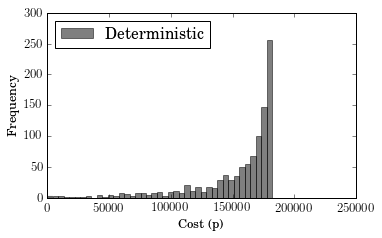

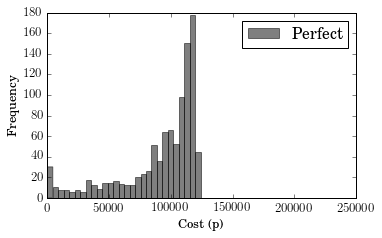

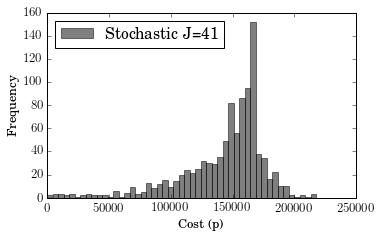

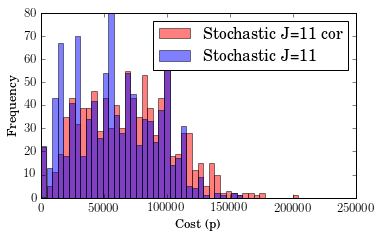

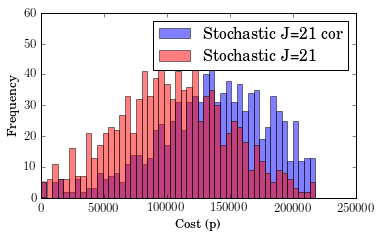

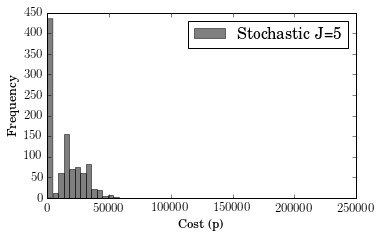

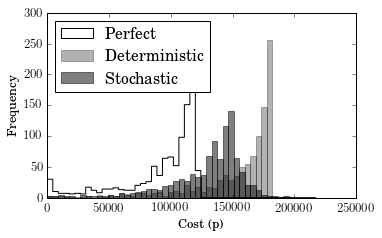

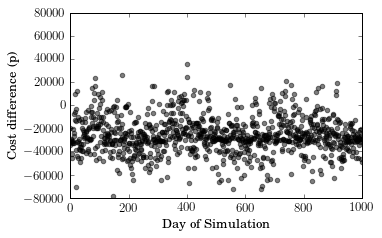

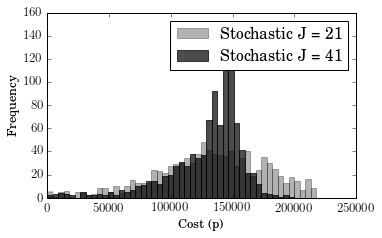

In [29]:
# 41!





plt.figure(figsize=(5.5,3.5))
plt.hist(df['Deterministic'], bins,color='black', alpha=0.5, label='Deterministic')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Deterministic_hist.pdf")
plt.show()
# Save and convert!
#os.system("pdfcrop %s %s" % (filename, filename))

plt.figure(figsize=(5.5,3.5))
plt.hist(df['Perfect'], bins, color='black', alpha=0.5, label='Perfect')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Perfect_hist.pdf")
plt.show()

plt.figure(figsize=(5.5,3.5))
plt.hist(df['Stochastic41 cor'], bins, color='black', alpha=0.5, label='Stochastic J=41')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Stoch41.pdf")
plt.show()

plt.figure(figsize=(5.5,3.5))
plt.hist(df['Stochastic11 cor'], bins, color='red', alpha=0.5, label='Stochastic J=11 cor')
plt.hist(df['Stochastic11'], bins, color='blue', alpha=0.5, label='Stochastic J=11')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Stoch11.pdf")
plt.show()

plt.figure(figsize=(5.5,3.5))
plt.hist(df['Stochastic21 cor'], bins, color='blue', alpha=0.5, label='Stochastic J=21 cor')
plt.hist(df['Stochastic21'], bins, color='red', alpha=0.5, label='Stochastic J=21')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Stoch21.pdf")
plt.show()

plt.figure(figsize=(5.5,3.5))
plt.hist(df['Stochastic5 cor'], bins, color='black', alpha=0.5, label='Stochastic J=5')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("Stoch5.pdf")
plt.show()





plt.figure(figsize=(5.5,3.5))
plt.scatter(df['Day'],df_results['Difference'], color='black', alpha = 0.5)
plt.axis([0, 1000, -80000, 80000])
plt.ylabel(r'Cost difference (p)')
plt.xlabel(r'Day of Simulation')
plt.tight_layout()
#plt.subplots_adjust(bottom= 0.17)
#plt.subplots_adjust(left=0.125)
plt.savefig("scatter.pdf")
plt.show()


plt.figure(figsize=(5.5,3.5))
#plt.hist(df['Perfect'], bins, histtype='step', color='black', alpha=1, label='Perfect')
#plt.hist(df['Deterministic'], bins, color='black', alpha=0.3, label='Deterministic')
#plt.hist(df['Stochastic5 cor'], bins, color='black', alpha=0.1, label='Stochastic J = 5')
#plt.hist(df['Stochastic11 cor'], bins, color='black', alpha=0.3, label='Stochastic J = 11')
plt.hist(df['Stochastic21 cor']*0.95, bins, color='black', alpha=0.3, label='Stochastic J = 21')
plt.hist(df['Stochastic41 cor']*0.9, bins, color='black', alpha=0.7, label='Stochastic J = 41')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("All_stochs.pdf")
plt.show()

181477.5
129182.704239
140221.460416
0.921276271516


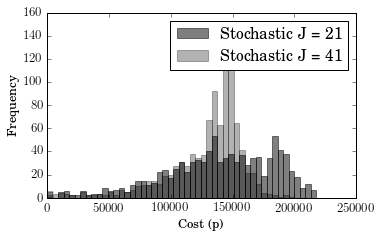

In [58]:
plt.figure(figsize=(5.5,3.5))
#plt.hist(df['Perfect'], bins, histtype='step', color='black', alpha=1, label='Perfect')
#plt.hist(df['Deterministic'], bins, color='black', alpha=0.3, label='Deterministic')
#plt.hist(df['Stochastic5 cor'], bins, color='black', alpha=0.1, label='Stochastic J = 5')
#plt.hist(df['Stochastic11 cor'], bins, color='black', alpha=0.3, label='Stochastic J = 11')
#plt.hist(df['Stochastic21 cor'], bins, color='red', alpha=0.3, label='Stochastic J = 21')
plt.hist(df['Stochastic21 cor2'], bins, color='black', alpha=0.5, label='Stochastic J = 21')
plt.hist(df['Stochastic41 cor']*0.9, bins, color='black', alpha=0.3, label='Stochastic J = 41')
plt.legend(loc='best')
plt.xlabel(r'Cost (p)')
plt.ylabel(r'Frequency')
plt.tight_layout()
plt.savefig("All_stochs.pdf")
plt.show()

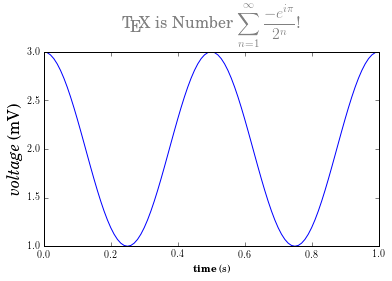

In [5]:
# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2


plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')
import math
plt.show()

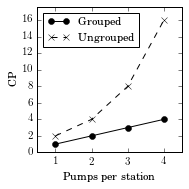

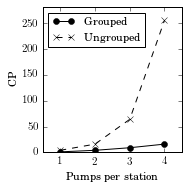

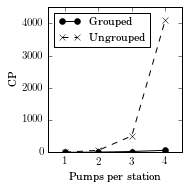

In [9]:
import math
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=11)
plt.rc('legend',**{'fontsize':11})

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def no_group(nh,n_p):
    vk = 1.0
    
    for j in range(1,nh+1):
        
        vp = 0.0
        for k in range(0,n_p+1):
            vp += math.factorial(n_p)/float(math.factorial(k)*math.factorial(n_p-k))
            #print vp
            
        
        vk = vk*vp
        
    return vk

def grouped(nh,n_p):
    v =1.0
    for j in range(1,nh+1):
        v = v*(n_p*+1)
        
    return v


gpd = {'label': 'Grouped','color':'k','marker':'o','linestyle':'-'}
ugpd = {'label': 'Ungrouped','color':'k','marker':'x','linestyle':'--'}

x = range(1,5)

y1= [grouped(1,i) for i in x]
y2 = [no_group(1,i) for i in x]

plt.figure(figsize=cm2inch(7,7))
plt.plot(x,y1,**gpd)
plt.plot(x,y2,**ugpd)
plt.legend(loc='best')
plt.axis([0.5,max(x)+0.5,0,max(y2)*1.1])
plt.xticks([1,2,3,4])
plt.xlabel(r'Pumps per station')
plt.ylabel(r'CP')
plt.tight_layout()
plt.savefig("one_station.pdf")
plt.show()


y1 = [grouped(2,i) for i in x]
y2 = [no_group(2,i) for i in x]

plt.figure(figsize=cm2inch(7,7))
plt.plot(x,y1,**gpd)
plt.plot(x,y2,**ugpd)
plt.legend(loc='best')
plt.xticks([1,2,3,4])
plt.axis([0.5,max(x)+0.5,0,max(y2)*1.1])
plt.xlabel(r'Pumps per station')
plt.ylabel(r'CP')
plt.tight_layout()
plt.savefig("two_station.pdf")
plt.show()


y1 = [grouped(3,i) for i in x]
y2 = [no_group(3,i) for i in x]

plt.figure(figsize=cm2inch(7,7))
plt.plot(x,y1,**gpd)
plt.plot(x,y2,**ugpd)
plt.legend(loc='best')
plt.xticks([1,2,3,4])
plt.axis([0.5,max(x)+0.5,0,max(y2)*1.1])
plt.xlabel(r'Pumps per station')
plt.ylabel(r'CP')
plt.tight_layout()
plt.savefig("three_station.pdf")
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 299


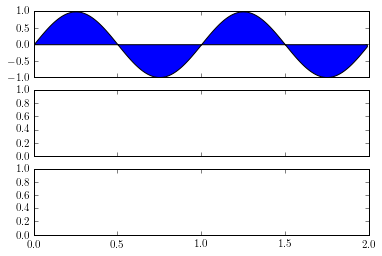

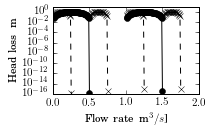

In [54]:
# pipe error plots
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)


plt.figure(figsize=cm2inch(7.85,5))

ax.plot(x, y1, x, y2, color='black')
ax = plt.plot(x,y1,**gpd)
ax.fill_between(x, y1, y2, facecolor='black', alpha=0.5, )

plt.semilogy(x,y2,**ugpd)
#plt.legend(loc='lower right')
#plt.xticks([1,2,3,4])
#plt.axis([0.5,max(x)+0.5,0,max(y2)*10])
plt.xlabel(r'Flow rate \left\[$m^3/s \right\] $]')
plt.ylabel(r'Head loss \left\[ $m$ \right\]')
plt.tight_layout()
#plt.savefig("three_station.pdf")
plt.show()


In [98]:
# class network():
#     """Defines a WDS with a pump, pipe Tank adn demand"""
class pipe:
    def __init__(self,L,D,Method = "DW",e = 0.0005, nu = 1.307*10**-6 ,rho = 999, C = 120):
        self.L = L
        self.D = D
        self.Method = Method
        self.e = e
        self.C = C
        self.nu = nu
        self.rho =  rho
        
        
    def headloss(self,q):
        """Returns Headloss in Pa
        q is flowrate in m3/s provide a number:
        (int or float) or np.array of values"""
        if q == 0:
            return 0
        
        if self.Method in {"DW", "Darcy","dw"}:
            return (8*self.f(q)*self.rho*self.L*q**2)/(self.D**5 * np.pi**2)
        
        
        elif self.Method in {"HW", "Hazen", "hw"}:
            raise ValueError("Hazen William not implimented, use DW you ludite!")
        
    def headloss_m(self,q):
        """Returns headloss in meters of water column, see headloss for details"""
        return self.headloss(q)/9806.38
    
    def f(self,q):
        """Uses  Swamee-Jain direct approximation of Colebrook-White"""
        self.q = q
        self.v = q/(0.25*np.pi*self.D**2)
        self.Re = self.v*self.D/self.nu
        
        if self.Re < 2300:
            return 64/self.Re
        else:
            return 0.25*(np.log10(self.e/(self.D * 3.7) + 5.74/self.Re**0.9 ) )**-2
    
    def funcF(self,flow,Delta_h):
            return Delta_h - self.headloss_m(flow)
    
    def flowrate_m(self,Delta_h):
        """Given a pressure differential in m, computes the resulting flowrate"""
        return optimize.newton(func=self.funcF, x0=0.4, args=(Delta_h,))

In [99]:
pipe1 = pipe(1000,.5)
pipe1.headloss(0)


0

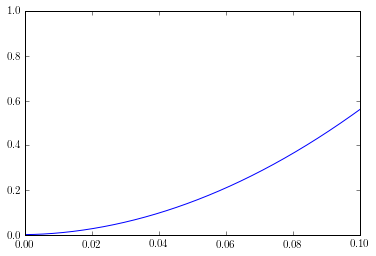

In [101]:
x = np.linspace(0,0.1,num=1000)
HL = [pipe1.headloss_m(i) for i in x]
plt.plot(x,HL)
plt.axis([0,0.1,0,1])
plt.show()

